In [1]:
import time
now = time.time()

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
train_dataset = pd.read_csv('DataSets/DatasetsCreated/train_dataset.csv')
train_dataset.shape

(1015389, 58)

In [4]:
test_dataset = pd.read_csv('DataSets/DatasetsCreated/test_dataset.csv')
test_dataset.shape

(113640, 54)

## Categorical Data

In [5]:
# categorical_features = ['Tag', 'Purchaser', 'Merchant_Popular']
# for feature in categorical_features:
#     train_dataset[feature] = pd.Categorical(train_dataset[feature])

# One Hot Encoding
# train_dataset = pd.concat([train_dataset,pd.get_dummies(train_dataset['Tag'], prefix='Tag',prefix_sep='_', drop_first=True,dummy_na=False)],axis=1)
# train_dataset = pd.concat([train_dataset,pd.get_dummies(train_dataset['DayOfWeek'], prefix='DayOfWeek',prefix_sep='_', drop_first=True,dummy_na=False)],axis=1)


In [6]:
train_dataset.columns

Index(['User_id', 'Merchant_id', 'Coupon_id', 'Discount_rate', 'Distance',
       'Date_received', 'Date', 'Count', 'Discount', 'Original_price',
       'Discounted_price', 'Rate', 'Tag', 'User_Released', 'User_Redeemed',
       'User_Ratio', 'User_Buys', 'Purchaser', 'UserMerchantCount', 'DayList',
       'User_Redeemed_Buy', 'Merchant_Redeemed', 'Merchant_Ratio',
       'Merchant_AvgDistance', 'Merchant_Popular', 'Merchant_AvgRate',
       'AvgDailyUsers', 'VisitList', 'UniqueUsersCount', 'Merchant_Buys',
       'MerchantRedemptionList', 'Merchant_Redeemed_Buy', 'Coupon_Released',
       'Coupon_Redeemed', 'Coupon_Ratio', 'Duration', 'RedemptionList',
       'ReleasesCount', 'ImpDay', 'Weekend', 'DayOfWeek', 'Visits',
       'User_Merchant_Ratio', 'User_Coupon_Redeemed', 'User_Coupon_Ratio',
       'Discounted_Redeemed', 'User_discount_Ratio', 'Merchant_User_Visit',
       'DateTrack', 'First_day', 'DayNum', 'LastUserVisit', 'LastRedemption',
       'LastMerchantVisit', 'LastMerchant

## Final Features

In [7]:
remove_columns = ['User_id', 'Merchant_id', 'Coupon_id', 'Discount_rate','Discount','Date_received',
                  'Date','Count','RedemptionDuration','DayList','DateTrack','DayNum','First_day',
                  'RedemptionList','VisitList', 'Merchant_User_Visit', 'MerchantRedemptionList',
                  'User_Coupon_Redeemed', 'User_Coupon_Ratio','User_discount_Ratio','Discounted_Redeemed']
unimportant_features = ['DayOfWeek','Weekend','ImpDay','Merchant_Popular','Purchaser']
features = list(set(train_dataset.columns)-set(remove_columns)-set(['Target'])-set(unimportant_features))
print('Features to be included:'+str(len(features)))                  
print(features)

Features to be included:31
['UserMerchantCount', 'Merchant_Redeemed_Buy', 'LastUserVisit', 'LastMerchantVisit', 'Merchant_Buys', 'ReleasesCount', 'User_Released', 'LastMerchantUserVisit', 'Visits', 'Distance', 'User_Buys', 'Discounted_price', 'Tag', 'User_Redeemed', 'LastMerchantRedemption', 'AvgDailyUsers', 'UniqueUsersCount', 'Original_price', 'Merchant_AvgRate', 'Coupon_Redeemed', 'Merchant_AvgDistance', 'LastRedemption', 'Merchant_Redeemed', 'Duration', 'Rate', 'Merchant_Ratio', 'User_Merchant_Ratio', 'User_Redeemed_Buy', 'Coupon_Ratio', 'Coupon_Released', 'User_Ratio']


# Model

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import precision_score,recall_score


In [9]:
def save_model(model):
    #saving model
    from sklearn.externals import joblib 

    # Save the model as a pickle in a file 
    joblib.dump(model, 'Model/xgboost.pkl') 

    # Load the model from the file 
    clf_saved= joblib.load('Model/xgboost.pkl')  


In [10]:
y = list(train_dataset['Target'])
X = train_dataset[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=100)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=100)

### XGBoost

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
params = {
        'min_child_weight': [1,2,3,4,5],
        'gamma': [0,0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8,1.0],
        'colsample_bytree': [0.6, 0.8,1.0],
        'max_depth': [3,4,5],
        'learning_rate': [0.01,0.05,0.1,0.5],
        'scale_pos_weight':[1],                 
        'alpha': [0.1,0.2,0.3,0.4,0.5]
        }
clf = XGBClassifier(n_estimators=500, objective='binary:logistic',
                    silent=True, nthread=1)
grid_search = GridSearchCV(estimator = clf,
                           param_grid = params,
                           scoring = 'roc_auc',
#                            cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
grid_search.best_params_

{'alpha': 0.2,
 'colsample_bytree': 0.8,
 'gamma': 0.5,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 2,
 'scale_pos_weight': 1,
 'subsample': 0.8}

In [12]:
def train_model():

    clf = XGBClassifier(
     learning_rate =0.1,
     n_estimators=500,
     max_depth=5,
     min_child_weight=2,
     gamma=0.5,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:logistic',
     nthread=3,
     scale_pos_weight=1,
     seed=410,
     alpha=0.2)
    
    model = clf.fit(X_train, y_train)
    save_model(model)
    
    ax = plot_importance(model)
    fig = ax.figure
    fig.set_size_inches(15, 9)
    plt.show()

    return model


/Users/mahimaarora/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


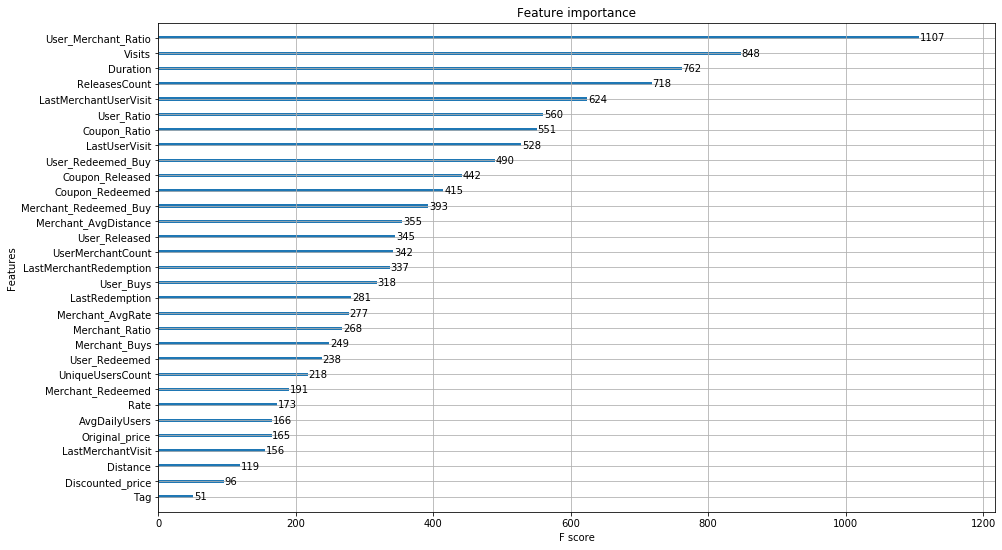

In [13]:
model = train_model()

In [14]:
# feature_importances = pd.DataFrame(model.feature_importances_,index = features,columns=['importance']).sort_values('importance',ascending=True)
# feature_importances.plot(kind='barh',figsize=(10,20))

In [15]:
def evaluate_model(X_check, y_check):
    
    
    predictions = (model.predict_proba(X_check)[:,1]).tolist()
    predicted_values = (model.predict(X_check)).tolist()
    test_dataset = pd.merge(X_check, train_dataset[['User_id','Merchant_id','Date_received']], how='left',left_index=True,right_index=True)
    output = test_dataset[['User_id','Merchant_id','Date_received']]
    output['Probabilities'] = predictions
    

    roc_score = round(roc_auc_score(y_check, predictions), 3)

    print('ROC AUC Score of Probailities:  '+ str(roc_score))
    print('ROC AUC Curve')
    fpr, tpr, _ = metrics.roc_curve(y_check, predictions)
    auc = metrics.roc_auc_score(y_check, predictions)
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    
    predicted_values = [1 if x>0.5 else 0 for x in predictions]
    print('______________________________________________________________________')
    print('\n The classification report for the model:')
    print(classification_report(y_check, predicted_values) )
    
    results = confusion_matrix(y_check, predicted_values) 
    print('______________________________________________________________________')
    print('\n The confusion matrix for the model:')
    print(results)
    print('______________________________________________________________________')
    
#     threshold = np.arange(0,1,0.001)
#     precision = np.zeros(len(threshold))
#     recall = np.zeros(len(threshold))
#     for i in range(len(threshold)):
#         y1 = np.zeros(len(y_check),dtype=int)
#         y1 = np.where(predictions<=threshold[i],0,1)
#         precision[i] = precision_score(y_check,y1)
#         recall[i] = recall_score(y_check,y1)

#     plt.figure(figsize=(12,9))
#     sns.set_style('whitegrid')
#     sns.lineplot(x=threshold,y=precision)
#     sns.lineplot(x=threshold,y=recall)
#     plt.xlabel('Threshold')
#     plt.title('Recall and Precision Values Vs Threshhold values')
#     plt.show()
    
    return output
    

## Test Data Scores

ROC AUC Score of Probailities:  0.992
ROC AUC Curve


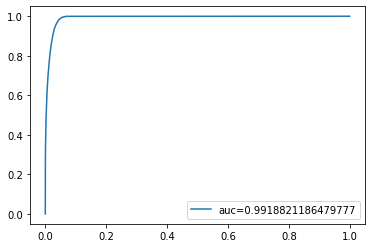

______________________________________________________________________

 The classification report for the model:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    142942
           1       0.80      0.77      0.78      9367

    accuracy                           0.97    152309
   macro avg       0.89      0.88      0.88    152309
weighted avg       0.97      0.97      0.97    152309

______________________________________________________________________

 The confusion matrix for the model:
[[141100   1842]
 [  2151   7216]]
______________________________________________________________________


,User_id,Merchant_id,Date_received,Probabilities
715091,5193451,7555,2016-04-16,6.239552e-07
936313,6788567,3527,2016-03-22,2.262212e-04
935861,6785479,450,2016-02-02,3.650616e-07
73628,536792,1375,2016-05-13,8.609647e-06
810548,5882244,4860,2016-02-07,8.289255e-07


In [16]:
test_output = evaluate_model(X_test, y_test)
test_output.head()

## Validation Data Scores

ROC AUC Score of Probailities:  0.992
ROC AUC Curve


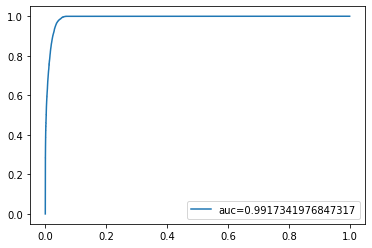

______________________________________________________________________

 The classification report for the model:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    121682
           1       0.79      0.77      0.78      7780

    accuracy                           0.97    129462
   macro avg       0.89      0.88      0.88    129462
weighted avg       0.97      0.97      0.97    129462

______________________________________________________________________

 The confusion matrix for the model:
[[120048   1634]
 [  1778   6002]]
______________________________________________________________________


,User_id,Merchant_id,Date_received,Probabilities
373670,2719236,2709,2016-05-18,7.033343e-07
80538,585881,2709,2016-02-02,4.832094e-07
418232,3041043,1433,2016-02-11,6.339661e-07
683806,4965863,8580,2016-03-30,1.806066e-06
466008,3386708,3381,2016-01-23,1.986209e-07


In [17]:
val_output = evaluate_model(X_val, y_val)
val_output.head()

In [18]:
# def training2(train_dataset):
#     y = list(train_dataset['Target'])
#     X = train_dataset[features]
#     data_dmatrix = xgb.DMatrix(data=X, label=y)
#     params =  {'objective':'binary:logistic','colsample_bytree':0.8,'learning_rate':0.1,
#                 'max_depth':5}
#     cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,num_boost_round=50,
#                         early_stopping_rounds=10, as_pandas=True, seed=0,  metrics='auc') 
#     return cv_results
    
# training2(train_dataset)

# Test Dataset and Submission File

In [19]:
predictions = (model.predict_proba(test_dataset[features])[:,1]).tolist()
predicted_values = (model.predict(test_dataset[features])).tolist()
test = pd.merge(test_dataset[features], test_dataset[['User_id','Merchant_id','Date_received']]
                , how='left',left_index=True,right_index=True)
output = test[['User_id','Merchant_id','Date_received']]
output['Probability'] = [round(i, 6) for i in predictions]
output[output['Probability']>0.5]

,User_id,Merchant_id,Date_received,Probability
20,7333378,6901,2016-07-27,0.997005
42,5427718,5084,2016-07-04,0.506556
178,2773771,7422,2016-07-25,0.709332
244,3937039,281,2016-07-10,0.513999
363,2762005,2206,2016-07-26,0.999455
...,...,...,...,...
113422,4532681,1469,2016-07-15,0.998688
113452,4459985,2436,2016-07-26,0.628508
113480,4593113,760,2016-07-13,0.978697
113498,5467613,2635,2016-07-01,0.797436


In [20]:
output.to_csv('OutputFile.csv',index=False) 

# Execution Time of this notebook

In [21]:
later = time.time()
difference = later - now
print('Time taken for the execution of this notebook: '+str(round(difference/60,2))+' mins')

Time taken for the execution of this notebook: 35.2 mins
